<a href="https://colab.research.google.com/github/itsokaypiyush/Predictive-Maintenance-Estimating-Machine-Wear-using-Linear-Regression/blob/main/Predictive_Maintenance_Estimating_Machine_Wear_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from google.colab import files
uploaded = files.upload()


Saving train_FD001.txt to train_FD001.txt


In [8]:
from google.colab import files
uploaded = files.upload()

Saving train_FD001.txt to train_FD001.txt


In [6]:
import pandas as pd

column_names = ['unit', 'time', 'op1', 'op2', 'op3'] + [f's{i}' for i in range(1, 22)]
df = pd.read_csv("train_FD001.txt", sep="\s+", header=None, names=column_names)

df.head()


,unit,time,op1,op2,op3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:

rul_df = df.groupby('unit')['time'].max().reset_index()
rul_df.columns = ['unit', 'max_time']


df = df.merge(rul_df, on='unit', how='left')


df['RUL'] = df['max_time'] - df['time']


df.drop('max_time', axis=1, inplace=True)


df[['unit', 'time', 'RUL']].head(10)


,unit,time,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187
5,1,6,186
6,1,7,185
7,1,8,184
8,1,9,183
9,1,10,182


In [8]:

features = df.drop(columns=['unit', 'time', 'RUL'])

target = df['RUL']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)


In [10]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 1966.20
R² Score: 0.57


In [12]:

squared_errors = (y_test.values - y_pred) ** 2


manual_mse = sum(squared_errors) / len(squared_errors)

print(f"Manual MSE: {manual_mse:.2f}")


Manual MSE: 1966.20


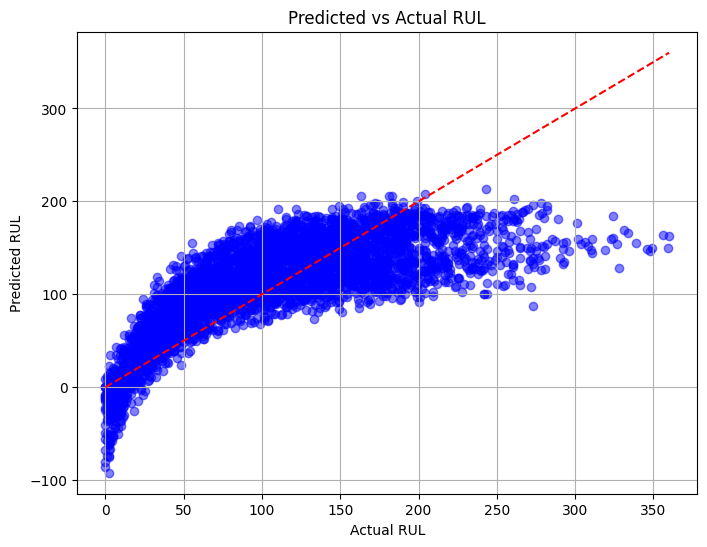

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Predicted vs Actual RUL")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


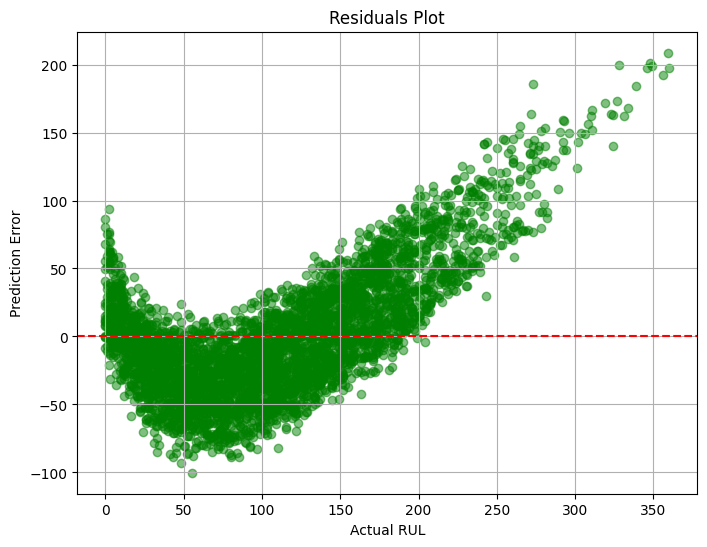

In [14]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual RUL")
plt.ylabel("Prediction Error")
plt.title("Residuals Plot")
plt.grid(True)
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [16]:

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)


y_pred_scaled = model_scaled.predict(X_test_scaled)

mse_scaled = ((y_test.values - y_pred_scaled) ** 2).mean()
print(f"Manual MSE after Scaling: {mse_scaled:.2f}")


Manual MSE after Scaling: 1966.20
